# **Acetaminophen Attenuates Perception of Auditory Stimuli**
# ***MODELING***



In [1]:
# basic coding/ML tools
import numpy as np, pandas as pd, os, sys, scipy as sp, xlrd, urllib, itertools, re, warnings
from jupyter_contrib_nbextensions.application import main
from ipywidgets import interact
from pandas.api.types import CategoricalDtype
from scipy import stats
from scipy.stats import ttest_ind

# ML tools
import sklearn, statsmodels.api as sm, statsmodels.formula.api as smf, statsmodels.stats.api as sms, pingouin as pg
from statsmodels.stats.anova import AnovaRM
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing, metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer, confusion_matrix, plot_confusion_matrix, classification_report, multilabel_confusion_matrix

# visualization tools
import matplotlib.pyplot as plt, seaborn as sns, IPython.display
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from IPython.display import Image, HTML
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)

# set directory
os.chdir("/Users/home/Desktop/Research/Tylenol/Analysis")

# only get warnings once
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%run Acetaminophen_Functions.ipynb

In [2]:
inducedLong = pd.read_csv('cleaned_inducedLong.csv')
perceivedLong = pd.read_csv('cleaned_perceivedLong.csv')

positive = pd.read_csv('positive.csv')
negative = pd.read_csv('negative.csv')
arousal = pd.read_csv('arousal.csv')
alldata = pd.read_csv('alldata.csv')
wide = pd.read_csv('wide_data_final.csv')

### **Regression: Predicting Positive Emotion Ratings**

In [3]:
# a priori selected variables for analysis (personality and features of the stimuli)
colList = ['DrugPlacebo', 'Locus', 'Familiarity', 
           'PosPANAS', 'NegPANAS', 
           'Mellow', 'Unpretentious', 'Sophisticated', 'Intense', 'Contemporary', 
           'PT', 'FS', 'EC', 'PD', 
           'E', 'A', 'C', 'N', 'O', 'AIMS', 
           'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
           'HighLow_High', 'HighLow_Low', 'HighLow_Neutral', 
           'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech']

X = positive[colList]
X = sm.add_constant(X)

y = positive['Ratings']

olsresult = sm.OLS(y, X).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     601.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:09:05   Log-Likelihood:                -30049.
No. Observations:               13218   AIC:                         6.015e+04
Df Residuals:                   13192   BIC:                         6.034e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.3730      0.143      9.629      0.000       1.093       1.652
DrugPlacebo                 -0.2222      0.042     -5.287      0.000      -0.305      -0.140
Locus                       -0.1616      0.048     -3.394      0.001      -0.255      -0.068
Familiarity                  0.4877      0.053      9.166      0.000       0.383       0.592
PosPANAS                     0.0055      0.003      1.908      0.056      -0.000       0.011
NegPANAS                     0.0303      0.004      7.851      0.000       0.023       0.038
Mellow                      -0.0583      0.024     -2.401      0.016      -0.106      -0.011
Unpretentious               -0.0076      0.022     -0.345      0.730      -0.051       0.036
Sophisticated                0.1528      0.024      6.270      0.000       0.105       0.201
Intense                     -0.0726      0.020     -3.545      0.000      -0.113      -0.032
Contemporary                -0.0198      0.023     -0.843      0.399      -0.066       0.026
PT                           0.0429      0.040      1.079      0.281      -0.035       0.121
FS                          -0.1873      0.035     -5.288      0.000      -0.257      -0.118
EC                          -0.0326      0.046     -0.706      0.480      -0.123       0.058
PD                           0.2472      0.039      6.308      0.000       0.170       0.324
E                            0.0583      0.029      2.044      0.041       0.002       0.114
A                            0.2069      0.045      4.588      0.000       0.119       0.295
C                           -0.1539      0.041     -3.748      0.000      -0.234      -0.073
N                           -0.1922      0.035     -5.513      0.000      -0.261      -0.124
O                            0.0540      0.046      1.164      0.245      -0.037       0.145
AIMS                         0.0009      0.001      0.872      0.383      -0.001       0.003
PosNeg_Negative             -1.6664      0.053    -31.461      0.000      -1.770      -1.563
PosNeg_Neutral              -0.1267      0.053     -2.387      0.017      -0.231      -0.023
PosNeg_Positive              3.1661      0.053     59.299      0.000       3.061       3.271
HighLow_High                 1.0538      0.053     19.882      0.000       0.950       1.158
HighLow_Low                  0.4458      0.053      8.355      0.000       0.341       0.550
HighLow_Neutral             -0.1267      0.053     -2.387      0.017      -0.231      -0.023
SoundType_Music              0.9284      0.059     15.786      0.000       0.813       1.044
SoundType_Natural Sounds     0.2502      0.057      4.381      0.000       0.138       0.362
SoundType_Speech             0.1944      0.060      3.224      0.001       0.076       0.313
==============

In [4]:
# Multicollinearity
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
len(vif[vif > 5]), vif[vif > 5]

(9,
 PosNeg_Negative             inf
 PosNeg_Neutral              inf
 PosNeg_Positive             inf
 HighLow_High                inf
 HighLow_Low                 inf
 HighLow_Neutral             inf
 SoundType_Music             inf
 SoundType_Natural Sounds    inf
 SoundType_Speech            inf
 dtype: float64)

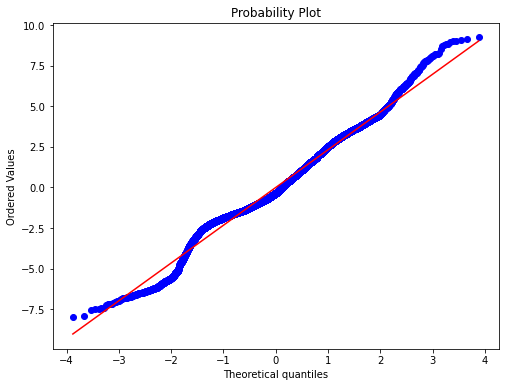

In [5]:
# Normality and autocorrelation of residuals
pred_val = olsresult.fittedvalues.copy()
true_val = y.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [6]:
# Data are normally distributed: Jarque-Bera
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(olsresult.resid)
lzip(name, test)

[('Jarque-Bera', 197.9055541600021),
 ('Chi^2 two-tail prob.', 1.0601197980251685e-43),
 ('Skew', 0.07395815798448113),
 ('Kurtosis', 3.5809122455452442)]

In [7]:
# Heteroskedasticity: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(olsresult.resid, X)
lzip(name, test)

[('Lagrange multiplier statistic', 358.4813657400142),
 ('p-value', 1.7720817215781e-58),
 ('f-value', 14.709994398213855),
 ('f p-value', 1.091442764768965e-61)]

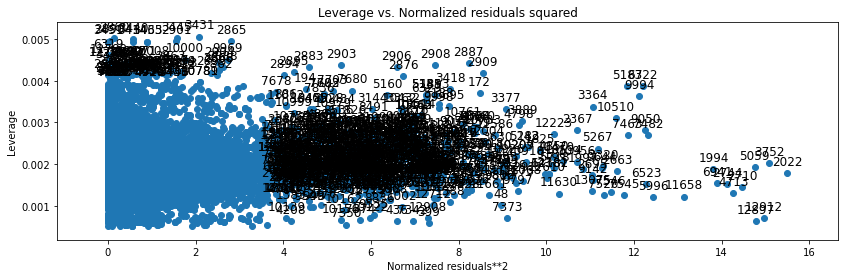

In [8]:
# Leverage/Outliers
sm.graphics.plot_leverage_resid2(olsresult)
plt.show()

### **Regression: Predicting Negative Emotion Ratings**

In [9]:
# a priori selected variables for analysis (personality and features of the stimuli)
colList = ['DrugPlacebo', 'Locus', 'Familiarity', 
           'PosPANAS', 'NegPANAS', 
           'Mellow', 'Unpretentious', 'Sophisticated', 'Intense', 'Contemporary', 
           'PT', 'FS', 'EC', 'PD', 
           'E', 'A', 'C', 'N', 'O', 'AIMS', 
           'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
           'HighLow_High', 'HighLow_Low', 'HighLow_Neutral', 
           'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech']

X = negative[colList]
X = sm.add_constant(X)

y = negative['Ratings']

olsresult = sm.OLS(y, X).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     470.5
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:09:11   Log-Likelihood:                -30675.
No. Observations:               13218   AIC:                         6.140e+04
Df Residuals:                   13192   BIC:                         6.160e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.5483      0.150     10.355      0.000       1.255       1.841
DrugPlacebo                 -0.1076      0.044     -2.442      0.015      -0.194      -0.021
Locus                       -0.2443      0.050     -4.894      0.000      -0.342      -0.146
Familiarity                  0.0692      0.056      1.241      0.215      -0.040       0.179
PosPANAS                     0.0037      0.003      1.227      0.220      -0.002       0.010
NegPANAS                     0.0422      0.004     10.443      0.000       0.034       0.050
Mellow                       0.0027      0.025      0.107      0.915      -0.047       0.053
Unpretentious               -0.0448      0.023     -1.931      0.054      -0.090       0.001
Sophisticated                0.0607      0.026      2.377      0.017       0.011       0.111
Intense                     -0.1017      0.021     -4.735      0.000      -0.144      -0.060
Contemporary                -0.0189      0.025     -0.768      0.442      -0.067       0.029
PT                           0.0468      0.042      1.123      0.261      -0.035       0.129
FS                          -0.0491      0.037     -1.321      0.187      -0.122       0.024
EC                           0.1627      0.048      3.357      0.001       0.068       0.258
PD                           0.2134      0.041      5.194      0.000       0.133       0.294
E                            0.1157      0.030      3.870      0.000       0.057       0.174
A                            0.0221      0.047      0.467      0.641      -0.071       0.115
C                           -0.1198      0.043     -2.781      0.005      -0.204      -0.035
N                           -0.0979      0.037     -2.678      0.007      -0.170      -0.026
O                           -0.1260      0.049     -2.590      0.010      -0.221      -0.031
AIMS                         0.0013      0.001      1.224      0.221      -0.001       0.003
PosNeg_Negative              3.0797      0.056     55.453      0.000       2.971       3.189
PosNeg_Neutral               0.2067      0.056      3.713      0.000       0.098       0.316
PosNeg_Positive             -1.7381      0.056    -31.047      0.000      -1.848      -1.628
HighLow_High                 0.7414      0.056     13.340      0.000       0.632       0.850
HighLow_Low                  0.6003      0.056     10.729      0.000       0.491       0.710
HighLow_Neutral              0.2067      0.056      3.713      0.000       0.098       0.316
SoundType_Music              0.2273      0.062      3.685      0.000       0.106       0.348
SoundType_Natural Sounds     0.8184      0.060     13.671      0.000       0.701       0.936
SoundType_Speech             0.5026      0.063      7.948      0.000       0.379       0.627
==============

In [10]:
# Multicollinearity
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
len(vif[vif > 5]), vif[vif > 5]

(9,
 PosNeg_Negative             inf
 PosNeg_Neutral              inf
 PosNeg_Positive             inf
 HighLow_High                inf
 HighLow_Low                 inf
 HighLow_Neutral             inf
 SoundType_Music             inf
 SoundType_Natural Sounds    inf
 SoundType_Speech            inf
 dtype: float64)

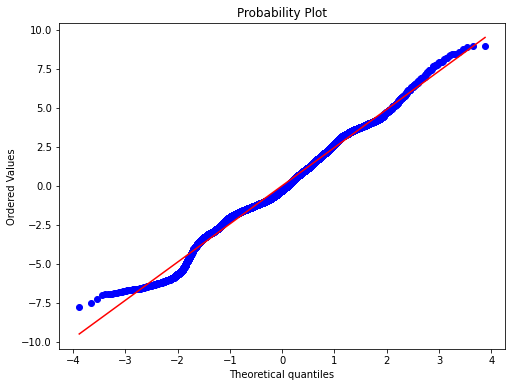

In [11]:
# Normality and autocorrelation of residuals
pred_val = olsresult.fittedvalues.copy()
true_val = y.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [12]:
# Data are normally distributed: Jarque-Bera
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(olsresult.resid)
lzip(name, test)

[('Jarque-Bera', 22.282558147229956),
 ('Chi^2 two-tail prob.', 1.4501201156128271e-05),
 ('Skew', 0.037406311023489056),
 ('Kurtosis', 3.1867127282465604)]

In [13]:
# Heteroskedasticity: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(olsresult.resid, X)
lzip(name, test)

[('Lagrange multiplier statistic', 649.8845869786616),
 ('p-value', 2.777412236158185e-118),
 ('f-value', 27.285801218980072),
 ('f p-value', 2.167690820447586e-124)]

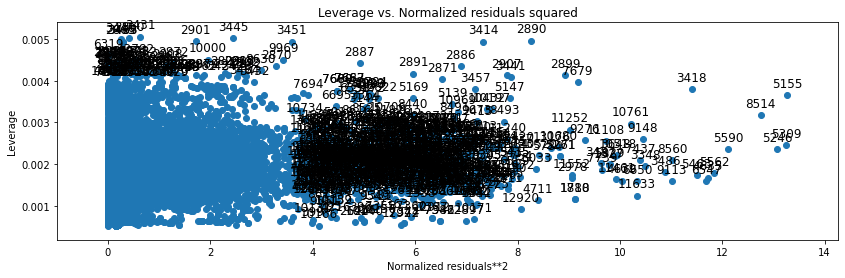

In [14]:
# Leverage/Outliers
sm.graphics.plot_leverage_resid2(olsresult)
plt.show()

### **Regression: Predicting Arousal Ratings**

In [15]:
# a priori selected variables for analysis (personality and features of the stimuli)
colList = ['DrugPlacebo', 'Locus', 'Familiarity', 
           'PosPANAS', 'NegPANAS', 
           'Mellow', 'Unpretentious', 'Sophisticated', 'Intense', 'Contemporary', 
           'PT', 'FS', 'EC', 'PD', 
           'E', 'A', 'C', 'N', 'O', 'AIMS', 
           'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
           'HighLow_High', 'HighLow_Low', 'HighLow_Neutral', 
           'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech']

X = arousal[colList]
X = X.drop(columns=['Locus'])
X = sm.add_constant(X)

y = arousal['Ratings']

olsresult = sm.OLS(y, X).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Ratings   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:09:17   Log-Likelihood:                -20658.
No. Observations:                8880   AIC:                         4.137e+04
Df Residuals:                    8855   BIC:                         4.154e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0227      0.183      5.597      0.000       0.664       1.381
DrugPlacebo                 -0.0405      0.054     -0.749      0.454      -0.146       0.065
Familiarity                  0.6931      0.072      9.644      0.000       0.552       0.834
PosPANAS                     0.0179      0.004      4.791      0.000       0.011       0.025
NegPANAS                     0.0244      0.005      4.932      0.000       0.015       0.034
Mellow                      -0.0401      0.031     -1.286      0.199      -0.101       0.021
Unpretentious               -0.0939      0.028     -3.316      0.001      -0.149      -0.038
Sophisticated                0.1003      0.031      3.202      0.001       0.039       0.162
Intense                      0.0360      0.026      1.364      0.173      -0.016       0.088
Contemporary                 0.0766      0.030      2.527      0.012       0.017       0.136
PT                           0.0922      0.051      1.810      0.070      -0.008       0.192
FS                          -0.2053      0.046     -4.496      0.000      -0.295      -0.116
EC                           0.2081      0.059      3.498      0.000       0.091       0.325
PD                           0.2628      0.050      5.221      0.000       0.164       0.361
E                            0.2467      0.037      6.708      0.000       0.175       0.319
A                            0.1363      0.058      2.354      0.019       0.023       0.250
C                           -0.3352      0.053     -6.377      0.000      -0.438      -0.232
N                           -0.0528      0.045     -1.178      0.239      -0.141       0.035
O                           -0.0238      0.060     -0.398      0.690      -0.141       0.093
AIMS                        -0.0006      0.001     -0.486      0.627      -0.003       0.002
PosNeg_Negative              0.5331      0.068      7.844      0.000       0.400       0.666
PosNeg_Neutral              -0.5805      0.068     -8.564      0.000      -0.713      -0.448
PosNeg_Positive              1.0701      0.069     15.566      0.000       0.935       1.205
HighLow_High                 2.2731      0.068     33.449      0.000       2.140       2.406
HighLow_Low                 -0.6700      0.069     -9.746      0.000      -0.805      -0.535
HighLow_Neutral             -0.5805      0.068     -8.564      0.000      -0.713      -0.448
SoundType_Music              0.5318      0.075      7.087      0.000       0.385       0.679
SoundType_Natural Sounds     0.9163      0.073     12.491      0.000       0.772       1.060
SoundType_Speech            -0.4255      0.073     -5.831      0.000      -0.568      -0.282
==============================================================================
Omnibus:                    

In [16]:
# Multicollinearity
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
len(vif[vif > 5]), vif[vif > 5]

(9,
 PosNeg_Negative             inf
 PosNeg_Neutral              inf
 PosNeg_Positive             inf
 HighLow_High                inf
 HighLow_Low                 inf
 HighLow_Neutral             inf
 SoundType_Music             inf
 SoundType_Natural Sounds    inf
 SoundType_Speech            inf
 dtype: float64)

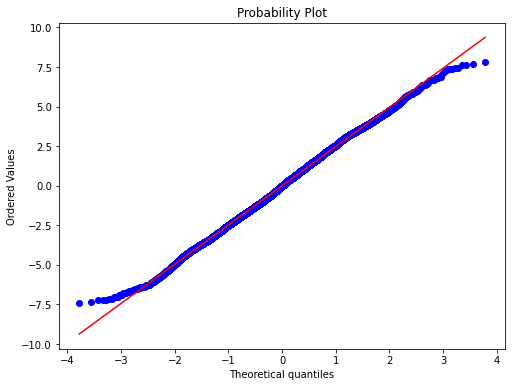

In [17]:
# Normality and autocorrelation of residuals
pred_val = olsresult.fittedvalues.copy()
true_val = y.values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [18]:
# Data are normally distributed: Jarque-Bera
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(olsresult.resid)
lzip(name, test)

[('Jarque-Bera', 21.945464688945773),
 ('Chi^2 two-tail prob.', 1.7163382902852744e-05),
 ('Skew', -0.016654345289829182),
 ('Kurtosis', 2.7587478541883015)]

In [19]:
# Heteroskedasticity: Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(olsresult.resid, X)
lzip(name, test)

[('Lagrange multiplier statistic', 282.6304814635438),
 ('p-value', 6.719255854178813e-44),
 ('f-value', 12.129160107071694),
 ('f p-value', 7.639096716579875e-47)]

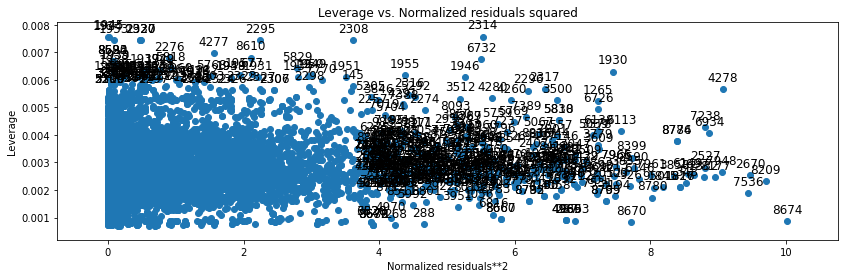

In [20]:
# Leverage/Outliers
sm.graphics.plot_leverage_resid2(olsresult)
plt.show()

### **Interactions**

**This is for ALL DATA -- aka perceived and induced, positive, negative, and arousal**

In [21]:
# only drug/placebo and personality
interactionresult = smf.ols(formula = 'Ratings ~ DrugPlacebo + E + A + C + N + O + PT + FS + EC + PD + AIMS + PosPANAS + NegPANAS + (DrugPlacebo * E) + (DrugPlacebo * A) + (DrugPlacebo * C) + (DrugPlacebo * N) + (DrugPlacebo * O) + (DrugPlacebo * PT) + (DrugPlacebo * FS) + (DrugPlacebo * EC) + (DrugPlacebo * PD) + (DrugPlacebo * AIMS) + (DrugPlacebo * PosPANAS) + (DrugPlacebo * NegPANAS) - 1', data = alldata).fit()
interactionresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Ratings   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.576
Method:                 Least Squares   F-statistic:                              1922.
Date:                Sun, 08 Nov 2020   Prob (F-statistic):                        0.00
Time:                        14:09:21   Log-Likelihood:                         -92597.
No. Observations:               35316   AIC:                                  1.852e+05
Df Residuals:                   35291   BIC:                                  1.855e+05
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
DrugPlacebo              2.9965      0.304      9.846      0.000       2.400       3.593
E                        0.1163      0.035      3.326      0.001       0.048       0.185
A                        0.4786      0.048     10.034      0.000       0.385       0.572
C                        0.1369      0.045      3.046      0.002       0.049       0.225
N                        0.1083      0.049      2.220      0.026       0.013       0.204
O                       -0.0561      0.054     -1.034      0.301      -0.163       0.050
PT                       0.0413      0.047      0.884      0.377      -0.050       0.133
FS                      -0.0705      0.043     -1.637      0.102      -0.155       0.014
EC                      -0.0895      0.055     -1.640      0.101      -0.197       0.017
PD                       0.1467      0.054      2.737      0.006       0.042       0.252
AIMS                    -0.0003      0.001     -0.213      0.831      -0.003       0.002
PosPANAS                 0.0190      0.004      5.177      0.000       0.012       0.026
NegPANAS                 0.0470      0.004     11.642      0.000       0.039       0.055
DrugPlacebo:E            0.0401      0.049      0.811      0.417      -0.057       0.137
DrugPlacebo:A           -0.4542      0.072     -6.282      0.000      -0.596      -0.313
DrugPlacebo:C           -0.4626      0.066     -7.044      0.000      -0.591      -0.334
DrugPlacebo:N           -0.2423      0.063     -3.876      0.000      -0.365      -0.120
DrugPlacebo:O            0.1662      0.074      2.253      0.024       0.022       0.311
DrugPlacebo:PT           0.1509      0.067      2.245      0.025       0.019       0.283
DrugPlacebo:FS          -0.0740      0.061     -1.206      0.228      -0.194       0.046
DrugPlacebo:EC           0.1379      0.078      1.757      0.079      -0.016       0.292
DrugPlacebo:PD           0.1619      0.070      2.328      0.020       0.026       0.298
DrugPlacebo:AIMS         0.0005      0.002      0.310      0.757      -0.003       0.004
DrugPlacebo:PosPANAS    -0.0113      0.005     -2.267      0.023      -0.021      -0.002
DrugPlacebo:NegPANAS    -0.0239      0.007     -3.573      0.000      -0.037      -0.011
==============================================================================
Omnibus:                    32765.051   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2616.451
Skew:                           0.287   Prob(JB):                         0.00
Kurtosis:                       1.796   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] R² is 

#### Conclusions:
* **Many of the personality factor interactions ARE significant, but the size of the interaction (beta score) is small**
* **Adjusted R^2 is now 0.576, which is much bigger than the original R^2 (~0.9)**
* *Note: I took out the constant in the formula*

|	Name	|	Coefficient	|	p	|	Interpretation	|
|	------	|	------	|	------	|	------	|
| 	DrugPlacebo:E 	|	0.0959	|	0.066	| 	No interaction between Extraversion and acetaminophen/placebo	| 
| 	***DrugPlacebo:A*** 	|	***-0.3778***	|	***0.000***	| 	 	| 
| 	***DrugPlacebo:C*** 	|	***-0.4526***	|	***0.000***	| 		| 
| 	***DrugPlacebo:N*** 	|	***-0.1972***	|	***0.002***	| 		| 
| 	***DrugPlacebo:O*** 	|	***0.1805***	|	***0.015***	| 		| 
| 	***DrugPlacebo:PT*** 	|	***0.1509***	|	***0.025***	| 		| 
| 	DrugPlacebo:FS	|	-0.0241	|	0.705	| 	No interaction between the Fantasy component of empathy and acetaminophen/placebo	| 
| 	DrugPlacebo:EC	|	0.1418	|	0.071	| 	No interaction between the Empathic Concern component of empathy and acetaminophen/placebo	| 
| 	***DrugPlacebo:PD***	|	***0.1651***	|	***0.019***	| 		| 
| 	DrugPlacebo:AIMS 	|	0.0014	|	0.437	| 	No interaction between the Absorption in Music Scale and acetaminophen/placebo	| 
| 	***DrugPlacebo:Nostalgia*** 	|	***-0.0897***	|	***0.005***	| 		| 
| 	***DrugPlacebo:NeedToBelong*** 	|	***-0.0191***	|	***0.006***	| 		|
| 	***DrugPlacebo:PosPANAS*** 	|	***-0.0134***	|	***0.008***	| 		| 
| 	***DrugPlacebo:NegPANAS*** 	|	***-0.0208***	|	***0.003***	| 		| 

### ***Conclusions***:
- Many of the personality factor interactions ARE significant, but the size of the interaction (beta score) is small and they are hard to interpret
- *Note: This is for ALL DATA (aka perceived emotion AND induced emotion)*

# **Mixed Model ANOVAs**
**Goal: mixed model anova for specific emotions and valence/arousal**
- We should probably expect no interaction there, suggesting that acetaminophen influences all emotions equally
- Within subjects: ratings for valence/arousal (specific emotions)
- Between subjects: drug/placebo

In [22]:
anova = alldata.loc[:,['FixedID', 'DrugPlacebo', 'Ratings', 'Locus',
                       'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
                       'HighLow_High', 'HighLow_Low','HighLow_Neutral', 
                       'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech',
                       'RatingType_Arousal', 'RatingType_Negative', 'RatingType_Positive']]

### *Perceived Emotion*

In [23]:
perceivedAnova = anova[anova['Locus'] == 0]

perceivedAnova['RatingType'] = perceivedAnova.apply(lambda row: ratingtype(row), axis=1)
perceivedAnova['SoundType'] = perceivedAnova.apply(lambda row: soundtype(row), axis=1)
perceivedAnova['StimulusType'] = perceivedAnova.apply(lambda row: stimulustype(row), axis=1)

perceivedAnova = perceivedAnova.drop(['Locus', 'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
                                      'HighLow_High', 'HighLow_Low','HighLow_Neutral', 
                                      'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech',
                                      'RatingType_Arousal', 'RatingType_Negative', 'RatingType_Positive'], axis=1)

# PosNeg
print("PERCEIVED EMOTION")
print("Rating Type: Only Positive vs Negative (No Arousal)")
posneg = perceivedAnova[perceivedAnova['RatingType'] != "Arousal"]
posneg_ANOVA = pg.mixed_anova(data=posneg, dv='Ratings', between='DrugPlacebo', 
                                  within='RatingType', subject='FixedID', effsize="np2")

pg.print_table(posneg_ANOVA)

PERCEIVED EMOTION
Rating Type: Only Positive vs Negative (No Arousal)

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
DrugPlacebo  6.856      1    238  6.856  4.393    0.037  0.018  nan
RatingType   0.032      1    238  0.032  0.086    0.769  0.000    1.000
Interaction  0.429      1    238  0.429  1.139    0.287  0.005  nan



In [45]:
# PosNeg
print("PERCEIVED EMOTION")
print("Rating Type: Only Positive vs Negative (No Arousal)")
posneg = perceivedAnova[perceivedAnova['RatingType'] != "Arousal"]
posneg_ANOVA = pg.mixed_anova(data=posneg, dv='Ratings', between='DrugPlacebo', 
                                  within='RatingType', subject='FixedID', effsize="np2")

pg.print_table(posneg_ANOVA)

mixed_model = smf.mixedlm("Ratings ~ DrugPlacebo + RatingType", posneg, groups="FixedID")
mixed_model_results = mixed_model.fit()
mixed_model_results.summary()

PERCEIVED EMOTION
Rating Type: Only Positive vs Negative (No Arousal)

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
DrugPlacebo  6.856      1    238  6.856  4.393    0.037  0.018  nan
RatingType   0.032      1    238  0.032  0.086    0.769  0.000    1.000
Interaction  0.429      1    238  0.429  1.139    0.287  0.005  nan



<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   Ratings    
No. Observations:     17760     Method:               REML       
No. Groups:           240       Scale:                11.1172    
Min. group size:      74        Log-Likelihood:       -46789.2484
Max. group size:      74        Converged:            Yes        
Mean group size:      74.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               3.861    0.085 45.552 0.000  3.695  4.027
RatingType[T.Positive] -0.016    0.050 -0.329 0.742 -0.115  0.082
DrugPlacebo            -0.239    0.114 -2.096 0.036 -0.463 -0.015
FixedID Var             0.630    0.022                           
=================================================================

"""

In [42]:
# SoundType
print("PERCEIVED EMOTION")
print("Sound Type: Speech, Natural Sounds, and Music")
soundtype_ANOVA = pg.mixed_anova(data=perceivedAnova, dv='Ratings', between='DrugPlacebo', 
                                 within='SoundType', subject='FixedID', effsize="np2")

pg.print_table(soundtype_ANOVA)

mixed_model = smf.mixedlm("Ratings ~ DrugPlacebo + SoundType", posneg, groups="FixedID")
mixed_model_results = mixed_model.fit()
mixed_model_results.summary()

PERCEIVED EMOTION
Sound Type: Speech, Natural Sounds, and Music

ANOVA SUMMARY

Source           SS    DF1    DF2      MS        F    p-unc    np2      eps
-----------  ------  -----  -----  ------  -------  -------  -----  -------
DrugPlacebo   5.527      1    238   5.527    2.205    0.139  0.009  nan
SoundType    87.799      2    476  43.900  203.019    0.000  0.460    0.978
Interaction   0.255      2    476   0.127    0.588    0.556  0.002  nan



<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM     Dependent Variable:     Ratings    
No. Observations:      17760       Method:                 REML       
No. Groups:            240         Scale:                  11.0535    
Min. group size:       74          Log-Likelihood:         -46740.2580
Max. group size:       74          Converged:              Yes        
Mean group size:       74.0                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    4.141    0.086 47.910 0.000  3.972  4.311
SoundType[T.Natural Sounds] -0.368    0.062 -5.933 0.000 -0.489 -0.246
SoundType[T.Speech]         -0.583    0.059 -9.911 0.000 -0.698 -0.467
DrugPlacebo                 -0.239    0.114 -2.096 0.036 -0.463 -0.015
FixedID Var                  0.631    0.022                           
======================================================================

"""

### *Induced Emotion*

In [24]:
inducedAnova = anova[anova['Locus'] == 0]

inducedAnova['RatingType'] = inducedAnova.apply(lambda row: ratingtype(row), axis=1)
inducedAnova['SoundType'] = inducedAnova.apply(lambda row: soundtype(row), axis=1)
inducedAnova['StimulusType'] = inducedAnova.apply(lambda row: stimulustype(row), axis=1)

inducedAnova = inducedAnova.drop(['Locus', 'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
                                      'HighLow_High', 'HighLow_Low','HighLow_Neutral', 
                                      'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech',
                                      'RatingType_Arousal', 'RatingType_Negative', 'RatingType_Positive'], axis=1)

# RatingType
print("INDUCED EMOTION")
print("Rating Type: Positive, Negative (no Arousal ratings in induced emotion)")
ratingtype_ANOVA = pg.mixed_anova(data=inducedAnova, dv='Ratings', between='DrugPlacebo', 
                                  within='RatingType', subject='FixedID', effsize="np2")

pg.print_table(ratingtype_ANOVA)

INDUCED EMOTION
Rating Type: Positive, Negative (no Arousal ratings in induced emotion)

ANOVA SUMMARY

Source           SS    DF1    DF2      MS       F    p-unc    p-GG-corr    np2      eps    sphericity    W-spher    p-spher
-----------  ------  -----  -----  ------  ------  -------  -----------  -----  -------  ------------  ---------  ---------
DrugPlacebo   5.837      1    238   5.837   2.334    0.128      nan      0.010  nan           nan        nan        nan
RatingType   64.690      2    476  32.345  73.777    0.000        0.000  0.237    0.973         0.000      0.973      0.037
Interaction   1.679      2    476   0.840   1.915    0.148      nan      0.008  nan           nan        nan        nan



# Scratchpad

### **Regression: Predicting All Ratings**

Here, we combine the *positive*, *negative*, and *arousal* dataframes into a single dataframe.

In [25]:
# colList = ['DrugPlacebo', 'Locus', 'Familiarity', 
#            'PosPANAS', 'NegPANAS', 
#            'Mellow', 'Unpretentious', 'Sophisticated', 'Intense', 'Contemporary', 
#            'PT', 'FS', 'EC', 'PD', 
#            'E', 'A', 'C', 'N', 'O', 'AIMS', 
#            'PosNeg_Negative', 'PosNeg_Neutral', 'PosNeg_Positive', 
#            'HighLow_High', 'HighLow_Low', 'HighLow_Neutral', 
#            'SoundType_Music', 'SoundType_Natural Sounds', 'SoundType_Speech',
#            'RatingType_Arousal', 'RatingType_Negative', 'RatingType_Positive'
#           ]

# X = alldata[colList]
# X = sm.add_constant(X)

# y = alldata['Ratings']

# olsresult = sm.OLS(y, X).fit()
# print(olsresult.summary())

### More Mixed Model ANOVAs

In [26]:
# # StimulusType
# print("PERCEIVED EMOTION")
# print("Stimulus Type: Negative Valence/Positive Valence/Neutral Valence and High Arousal/Low Arousal/NeutralArousal")
# stimulustype_ANOVA = pg.mixed_anova(data=perceivedAnova, dv='Ratings', between='DrugPlacebo', 
#                                     within='StimulusType', subject='FixedID', effsize="np2")

# pg.print_table(stimulustype_ANOVA) 

In [27]:
# # StimulusType
# print("INDUCED EMOTION")
# print("Stimulus Type: Negative Valence/Positive Valence/Neutral Valence and High Arousal/Low Arousal/NeutralArousal")
# stimulustype_ANOVA = pg.mixed_anova(data=perceivedAnova, dv='Ratings', between='DrugPlacebo', 
#                                     within='StimulusType', subject='FixedID', effsize="np2")

# pg.print_table(stimulustype_ANOVA) 

# # SoundType
# print("INDUCED EMOTION")
# print("Sound Type: Speech, Natural Sounds, and Music")
# soundtype_ANOVA = pg.mixed_anova(data=perceivedAnova, dv='Ratings', between='DrugPlacebo', 
#                                  within='SoundType', subject='FixedID', effsize="np2")

# pg.print_table(soundtype_ANOVA)

### **Logistic Regression: Predicting Drug vs. Placebo**
In order to use people's ratings to predict whether they were given the drug or a placebo, we have to change the data back to a wide format. 

Namely, there should be one row for each participant.

In [28]:
# colList = list(wide.columns)
# colList.remove('FixedID')

# cor = wide[colList].corr().abs().round(decimals=2)
# corNew = cor.unstack()
# corNew = corNew[(corNew != 1) & (corNew != 0)]
# corNew = corNew.dropna()
# corNew = corNew.sort_values(kind="quicksort", ascending = False)
# corNew = pd.DataFrame(corNew)
# corNew.head(5)

In [29]:
# # x and y
# drop_list = ['MedsEffectiveness', 'LastTimeTookMeds', 'FrequencyTakeMeds', 'Politics', 'ChildSES', 'AdultSES', 'Height', 'Weight', 
#              'SleepHours', 'WhenLastAte', 'HowMuchLastEat', 'SleepQuality', 'IllnessSeverity', 'exerciseMinToday', 'ExerciseRegularMins', 
#              'LastConsumeCaffeineHours', 'GeneralHealth', 'SubjectiveIllness', 'WhenLastSick', 'NumDoctorVisits', 'TakeMedsRecentlyYN', 
#              'BirthControlYN', 'MarijuanaFrequency', 'AlcoholAvg', 'ArthritisYN', 'Age', 'YearUniversity', 'NeedToBelong', 'Nostalgia', 
#              'EarlyFamilyEnvironment', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'PoliticalParty', 
#              'PreferredMeds', 'Gender'
#             ]

# # wide = wide.drop(drop_list, axis=1)
# wide = wide.astype(np.float64)
# colList = list(wide.columns)
# colList = [i for i in wide.columns if i not in ('FixedID', 'DrugPlacebo')]

# X = wide[colList]
# X = sm.add_constant(X)
# y = wide['DrugPlacebo']

# # logistic regression -- get singular matrix
# logit_model=sm.Logit(y,X)
# # result=logit_model.fit()
# # print(result.summary2())

#### *Graph Interactions*

In [30]:
### ALL DATA INTERACTIONS ###
# # Empathy 
# PT_interaction = interaction_plot(alldata['PT'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Perspective Taking Score')
# plt.title('Perspective Taking & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# FS_interaction = interaction_plot(alldata['FS'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Fantasy Score')
# plt.title('Fantasy & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# EC_interaction = interaction_plot(alldata['EC'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Empathic Concern Score')
# plt.title('Empathic Concern & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# PD_interaction = interaction_plot(alldata['PD'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Personal Distress Score')
# plt.title('Personal Distress & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# plt.show()

# # All Other Interactions
# AIMS_interaction = interaction_plot(alldata['AIMS'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='AIMS Score')
# plt.title('Absorption in Music Scale (AIMS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(45, 170) 

# ######################################################################################################
# PosPANAS_interaction = interaction_plot(alldata['PosPANAS'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Positive Emotions Score')
# plt.title('Positive Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# ######################################################################################################
# NegPANAS_interaction = interaction_plot(alldata['NegPANAS'], alldata['DrugPlacebo'], alldata['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Negative Emotions Score')
# plt.title('Negative Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# plt.show()

In [31]:
### PERCEIVED INTERACTIONS ###
# interactionP = alldata[alldata['Locus'] == 0]
# interactionPresult = smf.ols(formula = 'Ratings ~ DrugPlacebo + E + A + C + N + O + PT + FS + EC + PD + AIMS + Nostalgia + NeedToBelong + PosPANAS + NegPANAS + (DrugPlacebo * E) + (DrugPlacebo * A) + (DrugPlacebo * C) + (DrugPlacebo * N) + (DrugPlacebo * O) + (DrugPlacebo * PT) + (DrugPlacebo * FS) + (DrugPlacebo * EC) + (DrugPlacebo * PD) + (DrugPlacebo * AIMS) + (DrugPlacebo * Nostalgia) + (DrugPlacebo * NeedToBelong) + (DrugPlacebo * PosPANAS) + (DrugPlacebo * NegPANAS) - 1', data = interactionP).fit()
# print(interactionPresult.summary())

# # Personality
# E_interaction = interaction_plot(interactionP['E'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Extraversion Score')
# plt.title('PERCEIVED EMOTION: Extraversion & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# A_interaction = interaction_plot(interactionP['A'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Agreeableness Score')
# plt.title('PERCEIVED EMOTION: Agreeableness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# C_interaction = interaction_plot(interactionP['C'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Conscientiousness Score')
# plt.title('PERCEIVED EMOTION: Conscientiousness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# N_interaction = interaction_plot(interactionP['N'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Neuroticism Score')
# plt.title('PERCEIVED EMOTION: Neuroticism & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# O_interaction = interaction_plot(interactionP['O'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Openness Score')
# plt.title('PERCEIVED EMOTION: Openness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# plt.show()

# # Empathy 
# PT_interaction = interaction_plot(interactionP['PT'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Perspective Taking Score')
# plt.title('PERCEIVED EMOTION: Perspective Taking & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# FS_interaction = interaction_plot(interactionP['FS'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Fantasy Score')
# plt.title('PERCEIVED EMOTION: Fantasy & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# EC_interaction = interaction_plot(interactionP['EC'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Empathic Concern Score')
# plt.title('PERCEIVED EMOTION: Empathic Concern & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# PD_interaction = interaction_plot(interactionP['PD'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Personal Distress Score')
# plt.title('PERCEIVED EMOTION: Personal Distress & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# plt.show()

# # All Other Interactions
# AIMS_interaction = interaction_plot(interactionP['AIMS'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='AIMS Score')
# plt.title('PERCEIVED EMOTION: Absorption in Music Scale (AIMS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(45, 170) 

# ######################################################################################################
# PosPANAS_interaction = interaction_plot(interactionP['PosPANAS'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Positive Emotions Score')
# plt.title('PERCEIVED EMOTION: Positive Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# ######################################################################################################
# NegPANAS_interaction = interaction_plot(interactionP['NegPANAS'], interactionP['DrugPlacebo'], interactionP['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Negative Emotions Score')
# plt.title('PERCEIVED EMOTION: Negative Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# plt.show()

In [32]:
### INDUCED INTERACTIONS ###
# interactionI = alldata[alldata['Locus'] == 1]

# # get rid of Arousal ratings
# interactionI = alldata[alldata['RatingType_Arousal'] == 0]
# interactionIresult = smf.ols(formula = 'Ratings ~ DrugPlacebo + E + A + C + N + O + PT + FS + EC + PD + AIMS + Nostalgia + NeedToBelong + PosPANAS + NegPANAS + (DrugPlacebo * E) + (DrugPlacebo * A) + (DrugPlacebo * C) + (DrugPlacebo * N) + (DrugPlacebo * O) + (DrugPlacebo * PT) + (DrugPlacebo * FS) + (DrugPlacebo * EC) + (DrugPlacebo * PD) + (DrugPlacebo * AIMS) + (DrugPlacebo * Nostalgia) + (DrugPlacebo * NeedToBelong) + (DrugPlacebo * PosPANAS) + (DrugPlacebo * NegPANAS) - 1', data = interactionI).fit()
# print(interactionIresult.summary())

# # Personality
# E_interaction = interaction_plot(interactionI['E'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"],
#                                 markers=['D','^'], ylabel='Ratings', xlabel='Agreeableness Score')
# plt.title('INDUCED EMOTION: Extraversion & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# A_interaction = interaction_plot(interactionI['A'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Agreeableness Score')
# plt.title('INDUCED EMOTION: Agreeableness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# C_interaction = interaction_plot(interactionI['C'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Conscientiousness Score')
# plt.title('INDUCED EMOTION: Conscientiousness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# N_interaction = interaction_plot(interactionI['N'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Neuroticism Score')
# plt.title('INDUCED EMOTION: Neuroticism & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# ######################################################################################################
# O_interaction = interaction_plot(interactionI['O'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Openness Score')
# plt.title('INDUCED EMOTION: Openness & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(1, 5) 

# plt.show()

# # Empathy 
# PT_interaction = interaction_plot(interactionI['PT'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Perspective Taking Score')
# plt.title('INDUCED EMOTION: Perspective Taking & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# FS_interaction = interaction_plot(interactionI['FS'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Fantasy Score')
# plt.title('INDUCED EMOTION: Fantasy & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# EC_interaction = interaction_plot(interactionI['EC'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Empathic Concern Score')
# plt.title('INDUCED EMOTION: Empathic Concern & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# ######################################################################################################
# PD_interaction = interaction_plot(interactionI['PD'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Personal Distress Score')
# plt.title('INDUCED EMOTION: Personal Distress & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(0, 4) 

# plt.show()

# # All Other Interactions
# AIMS_interaction = interaction_plot(interactionI['AIMS'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='AIMS Score')
# plt.title('INDUCED EMOTION: Absorption in Music Scale (AIMS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(45, 170) 

# ######################################################################################################
# PosPANAS_interaction = interaction_plot(interactionI['PosPANAS'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Positive Emotions Score')
# plt.title('INDUCED EMOTION: Positive Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# ######################################################################################################
# NegPANAS_interaction = interaction_plot(interactionI['NegPANAS'], interactionI['DrugPlacebo'], interactionI['Ratings'], colors=["#3498db", "#9b59b6"], 
#                                  markers=['D','^'], ylabel='Ratings', xlabel='Negative Emotions Score')
# plt.title('INDUCED EMOTION: Negative Emotions (PANAS) & Acetaminophen/Placebo Interaction\n(Placebo = 0, Drug = 1)\nNOT SIGNIFICANT')
# plt.ylim(0, 10) 
# plt.xlim(10, 50) 

# plt.show()